In [1]:
#read in standard data sciecne libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

In [15]:
from fastai.vision import *

In [9]:
#connect workbook to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#save path to project folder 
root_path = 'drive/My Drive/Facemask_classifier/'

In [11]:
#save path for images folder that contains images and varaible tags
proj_path = 'drive/My Drive/Facemask_classifier/Data/'

In [12]:
#make folder names
folders = ['with_mask','without_mask']

In [16]:
#save fastai path
p_path = Path(proj_path)

In [19]:
#create image data bunch with 80/20 train test split
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train='.',valid_pct=0.2,
                                  ds_tfms=get_transforms(),size = 224, num_workers =4).normalize(imagenet_stats)

In [20]:
data.classes

['with_mask', 'without_mask']

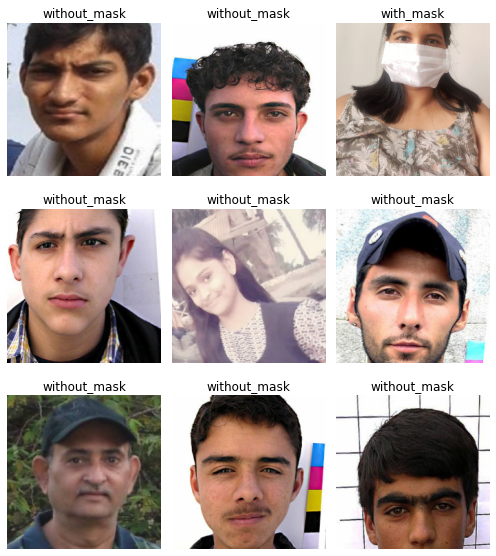

In [21]:
data.show_batch(rows = 3,figsize = (7,8))

In [22]:
data.classes, data.c,len(data.train_ds), len(data.valid_ds)

(['with_mask', 'without_mask'], 2, 749, 187)

In [24]:
#build the CVV learner 
learn = cnn_learner(data,models.resnet34,metrics = error_rate)

In [25]:
#train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.876959,0.108166,0.032086,00:49
1,0.468345,0.060411,0.010695,00:13
2,0.296286,0.072718,0.010695,00:13
3,0.205917,0.077466,0.010695,00:13
4,0.153001,0.069397,0.010695,00:12
5,0.113990,0.060021,0.016043,00:13
6,0.089377,0.059617,0.016043,00:13
7,0.072823,0.060190,0.016043,00:12


In [26]:
#save model
learn.save('model1_34',return_path=True)

PosixPath('drive/My Drive/Facemask_classifier/Data/models/model1_34.pth')

In [30]:
#Unfreeze the model so we can train earlier layers
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


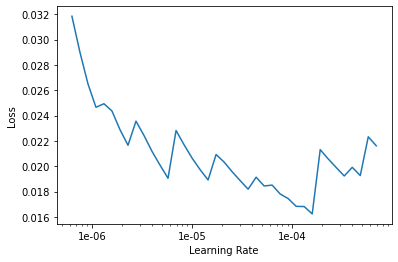

In [36]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [38]:
#fit whole model with new learning rates
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4),wd=0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.034581,0.064268,0.016043,00:13
1,0.029812,0.066694,0.010695,00:13


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


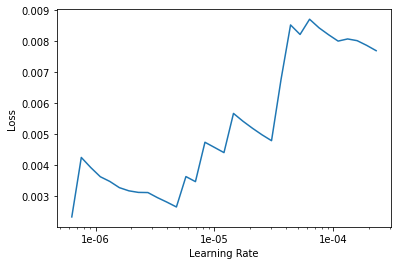

In [48]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [49]:
learn.save('model2_34')

In [51]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

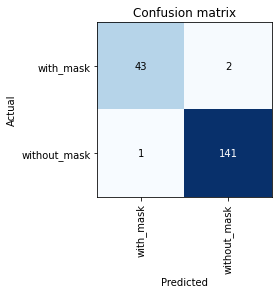

In [57]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

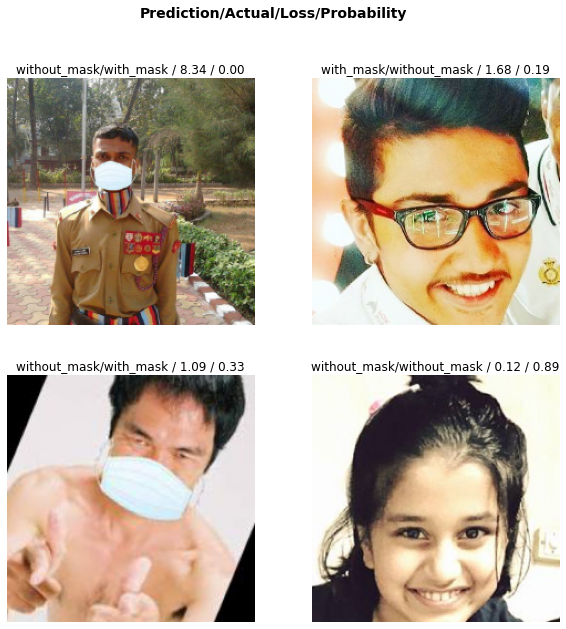

In [60]:
#plot top losses (most wrong)
interp.plot_top_losses(4,figsize=(10,10))